<a href="https://colab.research.google.com/github/Geeth-Rath/A-ML/blob/main/258417X_Assignment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

In [7]:
file_path = "/content/sample_data/seeds_dataset.txt"
columns = ["Area", "Perimeter", "Compactness", "Length of Kernel", "Width of Kernel", "Asymmetry Coefficient", "Kernel Groove Length", "Class"]
data = pd.read_csv(file_path, sep="\s+",  names=columns, header=None,engine="python")

In [8]:
print(data.head())

    Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Kernel Groove Length  Class  
0                  2.221                 5.220      1  
1                  1.018                 4.956      1  
2                  2.699                 4.825      1  
3                  2.259                 4.805      1  
4                  1.355                 5.175      1  


In [9]:
data.dropna(inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
X = data.iloc[:, :-1]  # First 7 columns are features
y_true = data.iloc[:, -1]  # Last column is the true labels

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Q1: Use the Elbow Method to determine the optimal number of clusters

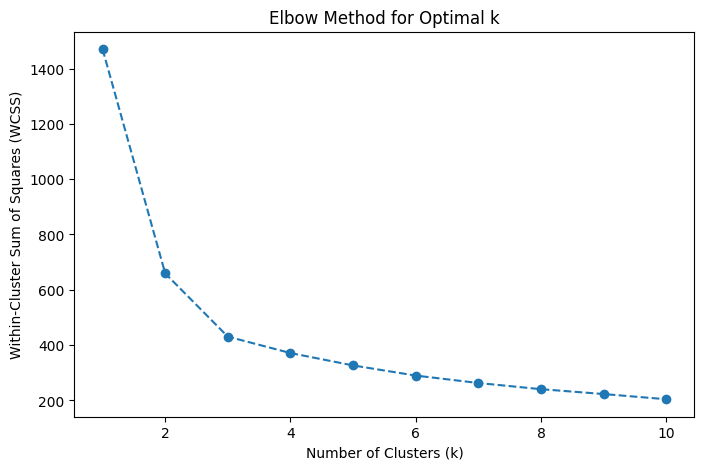

In [14]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [15]:
# Function to perform clustering and evaluate
def evaluate_clustering(X, y_true, model):
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    purity = np.sum([mode(y_true[labels == i])[1] for i in np.unique(labels)]) / len(y_true)
    return labels, silhouette, purity

Q2: Perform K-Means clustering with k=3 and evaluate

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels, silhouette_kmeans, purity_kmeans = evaluate_clustering(X_scaled, y_true.to_numpy(), kmeans)
print(f'K-Means Silhouette Score: {silhouette_kmeans:.4f}')
print(f'K-Means Purity Score: {purity_kmeans:.4f}')

K-Means Silhouette Score: 0.4007
K-Means Purity Score: 0.9190


Q3: Perform K-Medoids clustering with k=3 and evaluate

In [17]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels, silhouette_kmedoids, purity_kmedoids = evaluate_clustering(X_scaled, y_true.to_numpy(), kmedoids)

In [18]:
print(f'K-Medoids Silhouette Score: {silhouette_kmedoids:.4f}')
print(f'K-Medoids Purity Score: {purity_kmedoids:.4f}')

K-Medoids Silhouette Score: 0.3992
K-Medoids Purity Score: 0.8952


Q4: Compare clustering results

In [21]:
def compare_clustering(silhouette_kmeans, purity_kmeans, silhouette_kmedoids, purity_kmedoids):
    print("\nComparison of Clustering Algorithms")
    print("-----------------------------------")
    print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")
    print(f"K-Means Purity Score: {purity_kmeans:.4f}")
    print(f"K-Medoids Silhouette Score: {silhouette_kmedoids:.4f}")
    print(f"K-Medoids Purity Score: {purity_kmedoids:.4f}")

    # Determine better clustering method
    if silhouette_kmeans > silhouette_kmedoids and purity_kmeans > purity_kmedoids:
        print("K-Means outperforms K-Medoids on both Silhouette Score and Purity.")
    elif silhouette_kmedoids > silhouette_kmeans and purity_kmedoids > purity_kmeans:
        print("K-Medoids surpasses K-Means in both Silhouette Score and Purity.")
    elif silhouette_kmeans > silhouette_kmedoids and purity_kmedoids > purity_kmeans:
        print("While Silhouette Score favors K-Means, Purity suggests K-Medoids performs better.")
        print("K-Means tends to create more compact clusters, whereas K-Medoids shows better alignment with true classes.")
    elif silhouette_kmedoids > silhouette_kmeans and purity_kmeans > purity_kmedoids:
        print("Silhouette Score suggests K-Medoids is the better choice, but Purity indicates K-Means performs better.")
        print("K-Medoids forms well-separated clusters, but K-Means aligns more closely with the actual classes.")
    else:
        print("The results from both methods are fairly similar. It may be worth considering additional metrics or visualizations.")


In [22]:
compare_clustering(silhouette_kmeans, purity_kmeans, silhouette_kmedoids, purity_kmedoids)


Comparison of Clustering Algorithms
-----------------------------------
K-Means Silhouette Score: 0.4007
K-Means Purity Score: 0.9190
K-Medoids Silhouette Score: 0.3992
K-Medoids Purity Score: 0.8952
K-Means outperforms K-Medoids on both Silhouette Score and Purity.
